In [133]:
import cv2
from google.colab.patches import cv2_imshow
import dlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import os
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [134]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [135]:
dir="/content/drive/MyDrive/celeba_training/img/"

In [136]:
#This line initializes a face detector using dlib’s built-in frontal face detector.
#The detector uses a Histogram of Oriented Gradients (HOG) for face detection.
detector = dlib.get_frontal_face_detector() #--> HOG based model
model_path = '/content/drive/MyDrive/celeba_training/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(model_path)  #Generating set of coordinates (x,y) for each of the 68 predicted facial landmarks

In [137]:
tempLst=[]
imageNamesArray=[]
for i in range(5000):
  imagename=dir+str(i)+".jpg"
  cv2.imread(imagename)
  img=cv2.imread(imagename)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = detector(gray_img)
  #HOG outputs an array.
  #This array is a feature vector that captures the distribution of oriented gradients within an image region.
  for (i, face) in enumerate(faces):  #This loop iterates over all detected faces in the image
      # Determine the facial landmarks for the face region
      shape = predictor(gray_img, face) #--> It takes the grayscale image and the HOG output
      #Output: The model outputs a set of coordinates (x,y) for each of the 68 predicted facial landmarks.
      #The output is a data type called "full opject detection" object
      shape = [(shape.part(i).x, shape.part(i).y) for i in range(68)]
      #This line converts the full_object_detection object into a list of tuples.
      #Each tuple represents the (x, y) coordinates of a landmark point.
      #The shape.part(i) method accesses the ith landmark,
      #and shape.part(i).x and shape.part(i).y extract the x and y coordinates, respectively.
      # Convert the facial landmark (x, y)-coordinates to a NumPy array
      landmarks = np.array(shape)
      tempLst.append(landmarks)
      imageNamesArray.append(imagename)



In [138]:
arrNew=np.array(tempLst)

print(arrNew.shape)
print(imageNamesArray)
print(len(imageNamesArray))

(4850, 68, 2)
['/content/drive/MyDrive/celeba_training/img/0.jpg', '/content/drive/MyDrive/celeba_training/img/1.jpg', '/content/drive/MyDrive/celeba_training/img/4.jpg', '/content/drive/MyDrive/celeba_training/img/5.jpg', '/content/drive/MyDrive/celeba_training/img/6.jpg', '/content/drive/MyDrive/celeba_training/img/7.jpg', '/content/drive/MyDrive/celeba_training/img/8.jpg', '/content/drive/MyDrive/celeba_training/img/9.jpg', '/content/drive/MyDrive/celeba_training/img/10.jpg', '/content/drive/MyDrive/celeba_training/img/11.jpg', '/content/drive/MyDrive/celeba_training/img/12.jpg', '/content/drive/MyDrive/celeba_training/img/13.jpg', '/content/drive/MyDrive/celeba_training/img/14.jpg', '/content/drive/MyDrive/celeba_training/img/15.jpg', '/content/drive/MyDrive/celeba_training/img/16.jpg', '/content/drive/MyDrive/celeba_training/img/17.jpg', '/content/drive/MyDrive/celeba_training/img/18.jpg', '/content/drive/MyDrive/celeba_training/img/19.jpg', '/content/drive/MyDrive/celeba_training

In [139]:
df = pd.read_csv('/content/drive/MyDrive/celeba_training/labels.csv')
DontdropThese=[]
for i in imageNamesArray:

  x=i.replace('/content/drive/MyDrive/celeba_training/img/','')
  DontdropThese.append(x)

print(len(DontdropThese))

4850


In [140]:
df.head()

,Unnamed: 0,img_name,gender,smiling
0,0,0.jpg,-1,1
1,1,1.jpg,-1,1
2,2,2.jpg,1,-1
3,3,3.jpg,-1,-1
4,4,4.jpg,-1,-1


In [141]:
print(DontdropThese)

['0.jpg', '1.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '10

In [142]:
rows_to_drop = []
newLstt=[]

print(len(DontdropThese))
for i in DontdropThese:
  newLstt.append(int(i.split('.')[0].strip()))



for i in range(len(newLstt)):
  if i  not in newLstt:
    rows_to_drop.append(i)



rowstodropset=set()
for i in rows_to_drop:
  rowstodropset.add(i)


for j in rows_to_drop:
  df.drop(j, inplace=True)



4850


In [143]:
pd.DataFrame(columns=['x','y']).shape

(0, 2)

In [144]:
imageNamesArray2=[i.split('/content/drive/MyDrive/celeba_training/img/')[1] for i in imageNamesArray]


In [145]:

print(df.shape)
print(arrNew.shape) #landmarks
X_train= arrNew.reshape(arrNew.shape[0],-1)
print(X_train.shape) #new array

Y_train=np.array(df['gender'])
print (Y_train.shape)


(4850, 4)
(4850, 68, 2)
(4850, 136)
(4850,)


In [146]:
clf_dt = tree.DecisionTreeClassifier(max_depth=3)
clf_dt.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=3)

In [147]:
dir2='/content/drive/MyDrive/celeba_testing/img/'
tempLst=[]
imageNamesArray=[]
for i in range(1000):
  imagename=dir2+str(i)+".jpg"
  cv2.imread(imagename)
  img=cv2.imread(imagename)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = detector(gray_img)
  #HOG outputs an array.
  #This array is a feature vector that captures the distribution of oriented gradients within an image region.
  for (i, face) in enumerate(faces):  #This loop iterates over all detected faces in the image
      # Determine the facial landmarks for the face region
      shape = predictor(gray_img, face) #--> It takes the grayscale image and the HOG output
      #Output: The model outputs a set of coordinates (x,y) for each of the 68 predicted facial landmarks.
      #The output is a data type called "full opject detection" object
      shape = [(shape.part(i).x, shape.part(i).y) for i in range(68)]
      #This line converts the full_object_detection object into a list of tuples.
      #Each tuple represents the (x, y) coordinates of a landmark point.
      #The shape.part(i) method accesses the ith landmark,
      #and shape.part(i).x and shape.part(i).y extract the x and y coordinates, respectively.

      # Convert the facial landmark (x, y)-coordinates to a NumPy array
      landmarks = np.array(shape)
      tempLst.append(landmarks)
      imageNamesArray.append(imagename)



In [148]:
arrNew=np.array(tempLst)
print(arrNew.shape)
print(imageNamesArray)
print(len(imageNamesArray))

(976, 68, 2)
['/content/drive/MyDrive/celeba_testing/img/0.jpg', '/content/drive/MyDrive/celeba_testing/img/1.jpg', '/content/drive/MyDrive/celeba_testing/img/2.jpg', '/content/drive/MyDrive/celeba_testing/img/3.jpg', '/content/drive/MyDrive/celeba_testing/img/4.jpg', '/content/drive/MyDrive/celeba_testing/img/5.jpg', '/content/drive/MyDrive/celeba_testing/img/6.jpg', '/content/drive/MyDrive/celeba_testing/img/7.jpg', '/content/drive/MyDrive/celeba_testing/img/8.jpg', '/content/drive/MyDrive/celeba_testing/img/9.jpg', '/content/drive/MyDrive/celeba_testing/img/10.jpg', '/content/drive/MyDrive/celeba_testing/img/11.jpg', '/content/drive/MyDrive/celeba_testing/img/12.jpg', '/content/drive/MyDrive/celeba_testing/img/13.jpg', '/content/drive/MyDrive/celeba_testing/img/14.jpg', '/content/drive/MyDrive/celeba_testing/img/15.jpg', '/content/drive/MyDrive/celeba_testing/img/16.jpg', '/content/drive/MyDrive/celeba_testing/img/17.jpg', '/content/drive/MyDrive/celeba_testing/img/18.jpg', '/conten

In [149]:
df = pd.read_csv('/content/drive/MyDrive/celeba_testing/labels.csv')
DontdropThese=[]
for i in imageNamesArray:
  x=i.replace('/content/drive/MyDrive/celeba_testing/img/','')
  DontdropThese.append(x)

In [150]:
rows_to_drop = []
newLstt=[]

for i in DontdropThese:
  newLstt.append(int(i.split('.')[0].strip()))


for i in range(1000): #0 to 976
  if i  not in newLstt:
    rows_to_drop.append(i)


rowstodropset=set()
for i in rows_to_drop:
  rowstodropset.add(i)



for j in rows_to_drop:
  df.drop(j, inplace=True)




In [151]:
imageNamesArray2=[i.split('/content/drive/MyDrive/celeba_testing/img/')[1] for i in imageNamesArray]


In [152]:
print(df.shape)
print(arrNew.shape) #landmarks
X_test= arrNew.reshape(arrNew.shape[0],-1)
print(X_test.shape) #new array

Y_test=np.array(df['gender'])
print (Y_test.shape)


(976, 4)
(976, 68, 2)
(976, 136)
(976,)


In [153]:
clf_dt = tree.DecisionTreeClassifier(random_state=40,max_depth=3,min_samples_split=40)
clf_rf=RandomForestClassifier(random_state=40,n_estimators=20,min_samples_split=50)
clf_rf.fit(X_train,Y_train)
clf_dt.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=40, random_state=40)

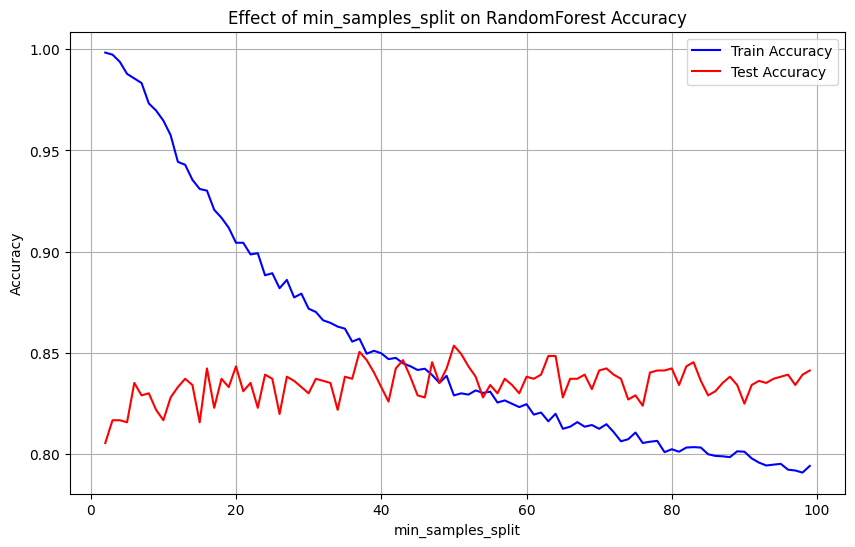

In [154]:
# Lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop over a range of min_samples_split values
for i in range(2, 100):
    clf_rf = RandomForestClassifier(random_state=40, n_estimators=20, min_samples_split=i)
    clf_rf.fit(X_train, Y_train)

    # Predictions
    Y_train_predrf = clf_rf.predict(X_train)
    Y_test_predrf = clf_rf.predict(X_test)

    # Calculate accuracy scores
    train_accuracy = metrics.accuracy_score(Y_train, Y_train_predrf)
    test_accuracy = metrics.accuracy_score(Y_test, Y_test_predrf)

    # Store the scores
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 100), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(2, 100), test_accuracies, label='Test Accuracy', color='red')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_split on RandomForest Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
clf_rf=RandomForestClassifier(random_state=40,n_estimators=20,min_samples_split=38)
clf_rf.fit(X_train,Y_train)

RandomForestClassifier(min_samples_split=38, n_estimators=20, random_state=40)

In [156]:
Y_train_pred = clf_dt.predict(X_train)
Y_train_predrf=clf_rf.predict(X_train)

In [157]:
Y_test_pred = clf_dt.predict(X_test)
Y_test_predrf = clf_rf.predict(X_test)

In [158]:
print('Accuracy Score on train data: ', metrics.accuracy_score(Y_train, Y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(Y_test, Y_test_pred))
print('Accuracy Score on train data RF: ', metrics.accuracy_score(Y_train, Y_train_predrf))
print('Accuracy Score on test data RF: ', metrics.accuracy_score(Y_test, Y_test_predrf))

Accuracy Score on train data:  0.711340206185567
Accuracy Score on test data:  0.798155737704918
Accuracy Score on train data RF:  0.8494845360824742
Accuracy Score on test data RF:  0.8463114754098361
